In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np
import datetime

col_list = ['vibration']
dataframe = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/sensor_data7.csv', usecols=col_list)
dataframe

,vibration
0,24
1,24
2,24
3,24
4,24
...,...
541,30
542,30
543,30
544,30


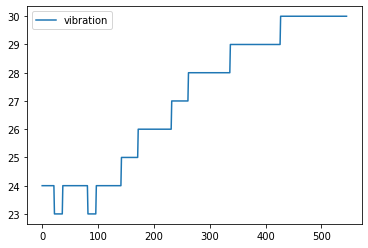

In [36]:
import matplotlib.pyplot as plt
dataframe.plot()

In [37]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataframe)
scaled_data.shape

(546, 1)

In [38]:
import math
training_data_len = math.ceil(len(scaled_data)*0.9) # 전체의 90%를 학습에 사용
train_data = scaled_data[0:training_data_len]
x_train = []
y_train = []

PAST_SET = 10
for i in range(PAST_SET, len(train_data)):
  x_train.append(train_data[i-PAST_SET:i,0])
  y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(482, 10, 1)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, batch_size = 1, epochs = 3)
model.save('/content/gdrive/My Drive/Colab Notebooks/saved_model.h5')

Epoch 1/3
482/482 [==============================] - 6s 6ms/step - loss: 0.0248
Epoch 2/3
482/482 [==============================] - 3s 6ms/step - loss: 0.0020
Epoch 3/3
482/482 [==============================] - 3s 6ms/step - loss: 0.0028


In [46]:
test_data = scaled_data[training_data_len - PAST_SET:, :]

x_test = []
y_test = dataframe.iloc[training_data_len:, :]
for i in range(PAST_SET, len(test_data)):
  x_test.append(test_data[i-PAST_SET:i, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [47]:
print(x_test.shape)
predictions = model.predict(x_test)
print(predictions.shape)
predictions = scalar.inverse_transform(predictions)
print(predictions.shape)
predictions = predictions

(54, 10, 1)
(54, 1)
(54, 1)


(54, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


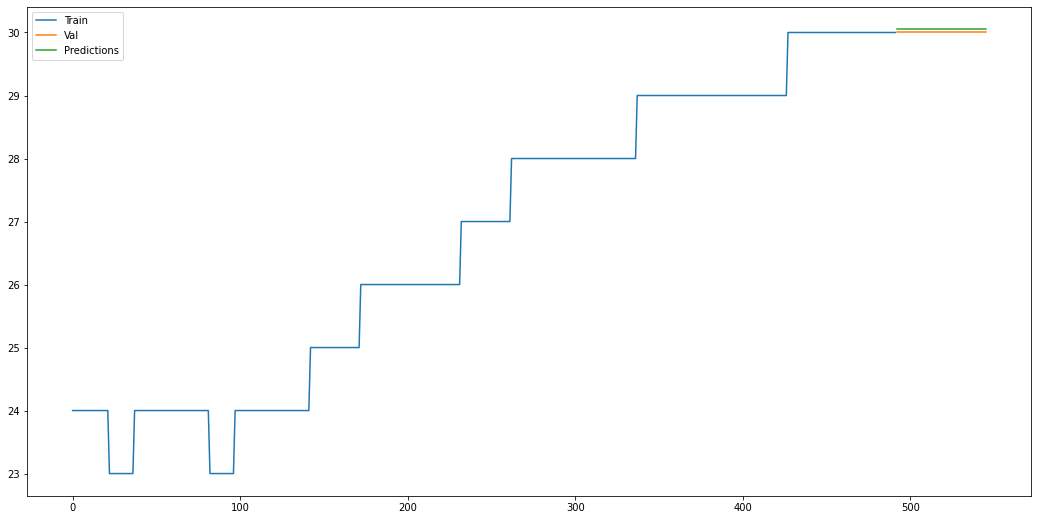

In [48]:
train = dataframe[:training_data_len]
valid = dataframe[training_data_len:]
valid['Predictions'] = predictions
print(predictions.shape)
plt.figure(figsize = (18,9))
plt.plot(train['vibration'])
plt.plot(valid[['vibration', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])

In [49]:
print(x_test.shape)
last_x = x_test[-1:]
print(last_x)
last_x.shape

(54, 10, 1)
[[[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]]


(1, 10, 1)

[[[ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [30.05870438]]]
[[[ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [30.05870438]
  [35.32528305]]]
[[[ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [30.05870438]
  [35.32528305]
  [38.78859711]]]
[[[ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [30.05870438]
  [35.32528305]
  [38.78859711]
  [40.83084869]]]
[[[ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [30.05870438]
  [35.32528305]
  [38.78859711]
  [40.83084869]
  [42.04350662]]]
[[[ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [ 1.        ]
  [30.05870438]
  [35.32528305]
  [38.78859711]
  [40.83084869]
  [42.04350662]
  [42.78915787]]]
[[[ 1.        ]
  [ 1.      

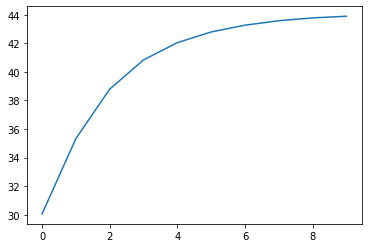

In [50]:
predict_step=10
len_x = len(last_x[0])

predictions2 = []
while len(predictions2) < predict_step:
  p = model.predict(last_x)
  p = scalar.inverse_transform(p)
  #p = p
  #print(p.shape)
  predictions2.append(p)
  for i in range(0,len_x-1):
    last_x[0][i]=last_x[0][i+1]
  last_x[0][len_x-1]=p
  print(last_x)
  
predictions2=np.array(predictions2)
predictions2=np.reshape(predictions2,(predict_step,1))
#print(predictions2)
plt.plot(predictions2)
# predictions2 로 플롯팅해보자

In [ ]:
X=np.array(range(dataframe.size,dataframe.size+predict_step-1))
Y=predictions2[1:]
plt.plot(train['Electric Current'])
plt.plot(valid[['Electric Current', 'Predictions']])
plt.plot(X,Y)

KeyError: ignored